In [1]:
from fastai.vision.all import *

In [2]:
path = Path().cwd().parent/"data"/"images"

In [3]:
files = get_image_files(path=path)
verify_images(files)

(#0) []

In [4]:
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [5]:
plants = plants.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = plants.dataloaders(path)

/home/ramonperez/anaconda/envs/sberry_desease_detect/lib/python3.10/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [6]:
dls = plants.dataloaders(path)

In [7]:
dls.valid.items[-3:]

[Path('/home/ramonperez/Tresors/datascience/projects/strawberry_leafs/data/images/decease/50.jpg'),
 Path('/home/ramonperez/Tresors/datascience/projects/strawberry_leafs/data/images/healthy/345.jpg'),
 Path('/home/ramonperez/Tresors/datascience/projects/strawberry_leafs/data/images/decease/150.jpg')]

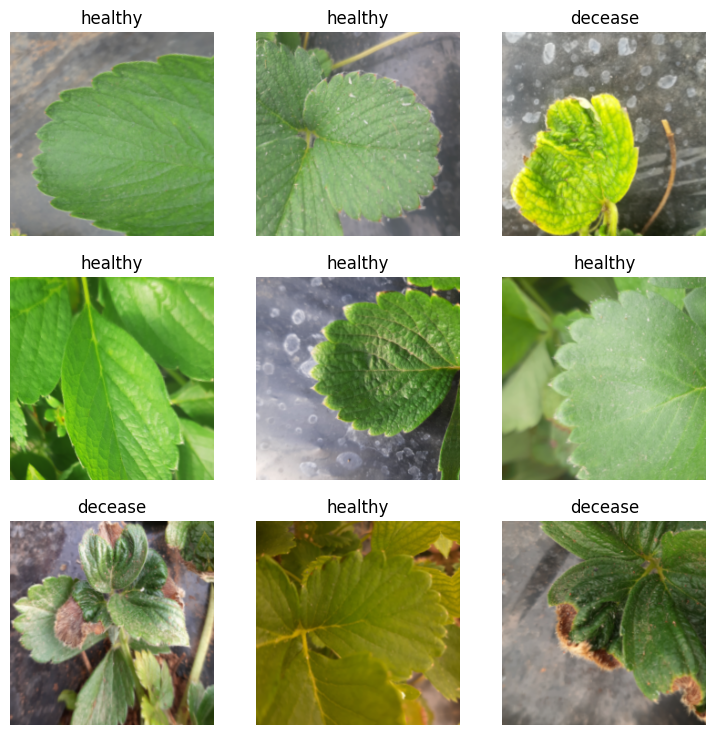

In [8]:
dls.show_batch()

Downloading `resnet34` will take a second.

In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/home/ramonperez/anaconda/envs/sberry_desease_detect/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ramonperez/anaconda/envs/sberry_desease_detect/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
learn.fine_tune(4)

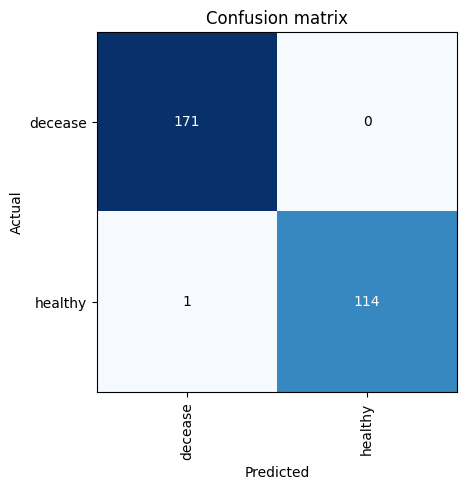

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [12]:
learn.predict(path/"decease"/"4.jpg")

('decease', TensorBase(0), TensorBase([1.0000e+00, 2.3598e-08]))

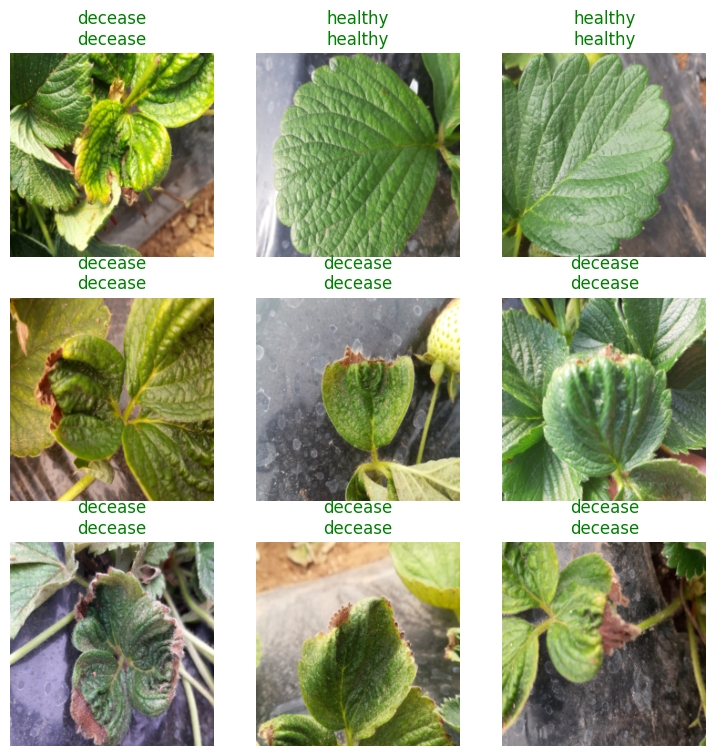

In [13]:
learn.show_results()

In [15]:
learn.export(fname="../models/model_2.pkl")

Get inference model.

In [17]:
learn_inf = load_learner(path.parents[1]/'models'/'model_2.pkl')

In [18]:
learn_inf.dls.vocab

['decease', 'healthy']

In [19]:
learn_inf.predict("../data/images/decease/1000.jpg")

('decease', TensorBase(0), TensorBase([0.9945, 0.0055]))